In [29]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr
import pickle

In [2]:
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data1 = pd.read_excel(current_path + file)

In [3]:
#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data1.iloc[2:-13]

#Columns containing Tenure months for the GM, Chef, Sales, Office Managers (some missing values)
TenureMonth = data2.iloc[:,[6,8,10,12]]

# dataX will be just the Questionare answers
dataX = data2.iloc[:,13:]

# dataY will be just the occupany column
dataY = data2.iloc[:,3]

#LocationCode will contain the column for the location code
LocationCode = data2.iloc[:,2]

# TurnOver will be contain the turn over rate
TurnOver = data2.iloc[:,4]

In [4]:
#Change the data type to float (from object).
dataY2=(pd.to_numeric(dataY, errors='coerce'))

LocationCode2=(pd.to_numeric(LocationCode, errors='coerce'))

TurnOver2=(pd.to_numeric(TurnOver, errors='coerce'))

In [5]:
#Change the data type to float for the Employee Answers
dataX2 = pd.DataFrame().reindex_like(dataX)

#Try to run a for loop to change each column to float type
for index in range(dataX.shape[1]):
   
   # Select column by index position using iloc[]
    dataX2.iloc[:,index] = (pd.to_numeric(dataX.iloc[:,index], errors='coerce'))


In [6]:
#Do the same for the Tenure data frame.
TenureMonth2 = pd.DataFrame().reindex_like(TenureMonth)

#Try to run a for loop to change each column to float type
for column in range(TenureMonth.shape[1]):
   
   # Select column by index position using iloc[]
    TenureMonth2.iloc[:,column] = (pd.to_numeric(TenureMonth.iloc[:,column], errors='coerce'))

In [7]:
# Read csv for the median income 
file = '/datasets/ActivatedInsights/ACS175YRS1903.csv'
IncomeData = pd.read_csv(current_path + file, header=1)

In [8]:
# Read the sheet for the location code to zip code mapping
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx' #slash was wrong fixed to the correct back slash
CodeToZip = pd.read_excel(current_path + file, sheet_name = 5, header = 1)

In [9]:
#Convert to the integer?
#make the CotdeToZipNumeric the same size
CodeToZipNumeric = pd.DataFrame().reindex_like(CodeToZip)

#Try to run a for loop to change each column to float type
for index in range(CodeToZip.shape[1]):
   
   # Select column by index position using iloc[]
    CodeToZipNumeric.iloc[:,index] = (pd.to_numeric(CodeToZip.iloc[:,index], errors='coerce'))



In [10]:
#Rename the column for the mdian income
IncomeData.rename(columns={'Median income (dollars); Estimate; Households': 'MedianIncome'}, inplace=True)

#GO through all the location data and make an array that contains the median income.

#First reset the index of the LocationCode
LocationCode3=LocationCode2.reset_index(drop=True)

#make a new series with same shape as LocationCode. This will contain Median Income Data
#MedianIncomeData = pd.DataFrame().reindex_like(dataY3)
RowIndex1=range(LocationCode3.shape[0])
MedianIncomeData = pd.DataFrame(columns=['MedianIncomeForZip'], index=RowIndex1)
 
#for loop to get the Median income for each location's zip code.
for row in range(LocationCode3.shape[0]):
    
    ZipCode=CodeToZip.loc[CodeToZip['Code'] == LocationCode3[row],:]
    #Zip Code actually is a big list of all the rows that had the location code.
    #They should all point to the same zip code (in the second column) so chose the top one.
    ZipCodeSelect=ZipCode.iloc[0,1]
    
    #Get the value for the median income corresponding to the ZipCodeSelect
    MedianIncomeValue1 = IncomeData.loc[ IncomeData['Id2'] == ZipCodeSelect , 'MedianIncome' ]
    #make it numeric
    MedianIncomeValue2=pd.to_numeric(MedianIncomeValue1, errors='coerce')
    #need to figure out why I need to specify the value instead of the index-value pair
    MedianIncomeData.iloc[row]=MedianIncomeValue2.iloc[0]
   
   
    # Select column by index position using iloc[]
   # dataX3.iloc[:,index] = (pd.to_numeric(data2.iloc[:,index], errors='coerce'))

In [11]:
TenureMonth2.describe()
#we notice that there are some missing values. It's probably best to take the median and replace with it.

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
count,250.000000,238.000000,245.000000,241.000000
mean,32.404000,54.441176,23.118367,33.004149
std,32.775505,62.580671,24.281104,34.692038
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,10.000000,5.000000,9.000000
50%,16.000000,30.000000,13.000000,19.000000
75%,53.750000,78.750000,37.000000,46.000000
max,147.000000,325.000000,113.000000,210.000000


In [12]:
#Check where the missing values are.
TenureMonth2.loc[(TenureMonth2['Unnamed: 6'].isnull()) |
              (TenureMonth2['Unnamed: 8'].isnull()) |
              (TenureMonth2['Unnamed: 10'].isnull()) |
              (TenureMonth2['Unnamed: 12'].isnull())]

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
6,13.0,36.0,66.0,NaN
31,14.0,80.0,7.0,NaN
35,138.0,NaN,14.0,12.0
41,34.0,29.0,37.0,NaN
43,61.0,21.0,NaN,7.0
46,24.0,137.0,0.0,NaN
49,79.0,127.0,NaN,13.0
51,92.0,12.0,NaN,32.0
53,49.0,10.0,NaN,43.0
54,0.0,NaN,4.0,27.0


In [13]:
#Replace the missing data for Tenure of GM with median values.
MedianTenureGM = TenureMonth2.loc[:,'Unnamed: 6'].median()

TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 6'].isnull())] = MedianTenureGM

In [14]:
#Replace the chef, sales leader, and office manager's missing tenure with their median
MedianTenureChef = TenureMonth2.loc[:,'Unnamed: 8'].median()
MedianTenureSales = TenureMonth2.loc[:,'Unnamed: 10'].median()
MedianTenureOffice = TenureMonth2.loc[:,'Unnamed: 12'].median()


TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 8'].isnull())] = MedianTenureChef
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 10'].isnull())] = MedianTenureSales
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 12'].isnull())] = MedianTenureOffice

''

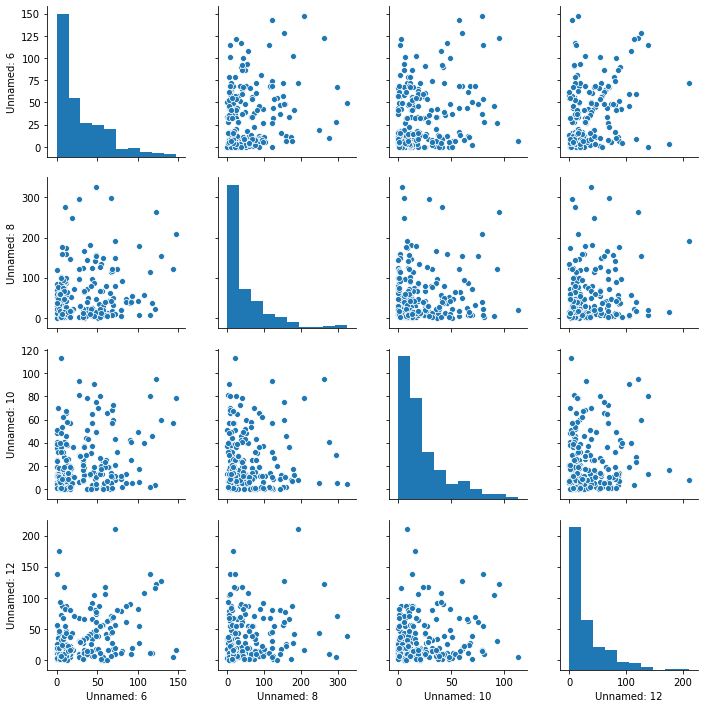

In [15]:
#Tenure monthes are extrenely poistively skewed. May be log (x+1) transform?
sb.pairplot(TenureMonth2)
;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812d517518>]],
      dtype=object)

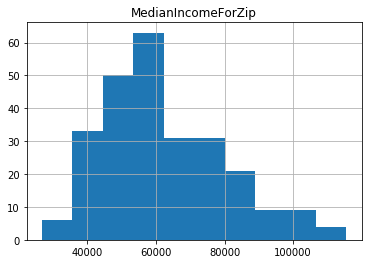

In [16]:
#Median income is also poistively skewed.
MedianIncomeData.hist()

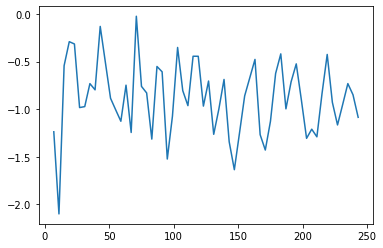

In [17]:
#Employee response featres are all negatively skewed.
skewValue = dataX2.skew(axis=0)
sb.lineplot(data=skewValue)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812ebde438>,
      dtype=object)

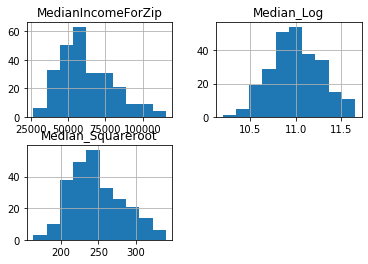

In [18]:
#MedianIncomeData is positively skewed.
#Apply sqrt
MedianIncomeData['Median_Squareroot']=MedianIncomeData['MedianIncomeForZip']**(1/2)
#Take log
MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip'])
MedianIncomeData.hist()

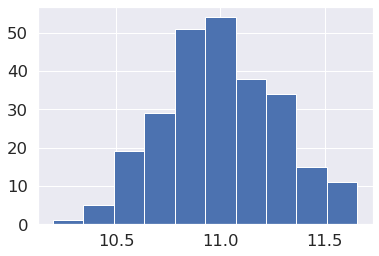

In [19]:
#Save the hisogram for the log transformed median income.
sb.set(font_scale=1.5)
sns_plot = MedianIncomeData.iloc[:,2].hist()
sns_plot.figure.savefig("MedianIncomeLog.png")

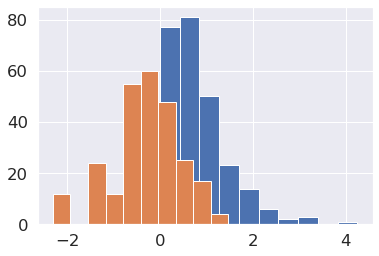

In [31]:
#Start transforming the data
#For the room occupancy number and turnover we check below, looks like the Turnover should be at least log transformed.
#Also add 0.1 because we don't want the zero turnover.
#Save the original turnover values before the transformation together with the original questionare values

with open('original_values.pickle', 'wb') as f:
    pickle.dump([TurnOver2, dataX2], f)

TurnOver2.hist()
LogTurnover=np.log(TurnOver2+0.1)
LogTurnover.hist()

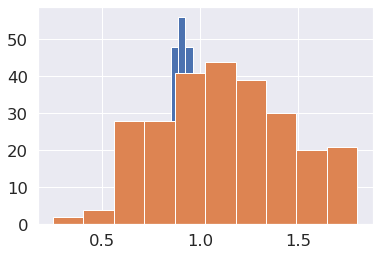

In [21]:
#For room occupancy.
dataY2.hist()
#it's negatively skewed so flip, take log, then flip back.
dataY2Flip=1.1-dataY2
dataY2Log=np.log(dataY2Flip)
OccupancyLogFlip=-0.5-dataY2Log
OccupancyLogFlip.hist()

In [22]:
#For the DataX, because they are mostly negative, flip it by subtracting it from 1.1 and then use log transform.
#After that flip back again by subtracting it from another value.
NewDataX2=1.1-dataX2
NewDataX2Log=NewDataX2.apply(np.log) # returns DataFrame
NewDataX2LogFlip=0.1-NewDataX2Log


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812cb4acf8>,
      dtype=object)

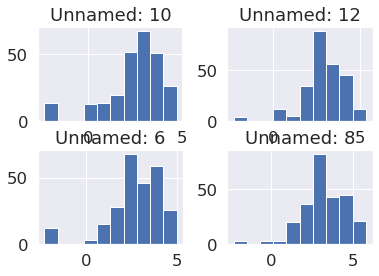

In [23]:
#We need to log transform the TenureMonth3, but add 0.1 so that we don't have to deal with the log of zero.
NewTenureMonth2=TenureMonth2+0.1
NewTenureMonth2Log=NewTenureMonth2.apply(np.log) # returns DataFrame
NewTenureMonth2Log.hist()

In [24]:
#Now we have more or less normally distributed input variables.
#We have NewDataX3LogFlip for the employee response
#We have LogTurnover for the turnover rate.
#We have OccupancyLogFlip for the occupancy.
#We have MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip']) for Median Income Data
#We have NewTenureMonth3Log

#Standarize
scalerEmployeeResponse = pp.StandardScaler().fit(NewDataX2LogFlip)
EmployeeResponse = scalerEmployeeResponse.transform(NewDataX2LogFlip)
EmployeeResponseDF=pd.DataFrame(data=EmployeeResponse)

scalerMedianIncomeData = pp.StandardScaler().fit(MedianIncomeData)
MedianIncomeDataS = scalerMedianIncomeData.transform(MedianIncomeData)
MedianIncomeDataSDF=pd.DataFrame(data=MedianIncomeDataS)

scalerTenureMonth = pp.StandardScaler().fit(NewTenureMonth2Log)
TenureMonthS = scalerTenureMonth.transform(NewTenureMonth2Log)
TenureMonthSDF=pd.DataFrame(data=TenureMonthS)

OccupancyTurnover=pd.concat([OccupancyLogFlip, LogTurnover], axis=1)

scalerOccupancyTurnover = pp.StandardScaler().fit(OccupancyTurnover)
OccupancyTurnoverS = scalerOccupancyTurnover.transform(OccupancyTurnover)
OccupancyTurnoverSDF=pd.DataFrame(data=OccupancyTurnoverS)



In [30]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump([scalerEmployeeResponse, scalerOccupancyTurnover], f)


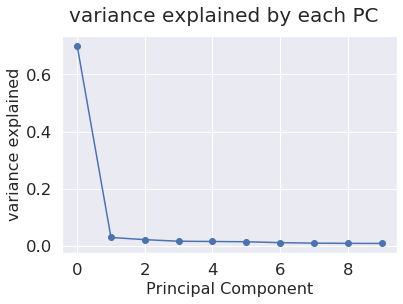

In [25]:
#Because we have 60 columns for Employee response, we will take the PCA for this one and reduce the dimension
#Then first try linear regression, then perhaps logit regression or other regressions.

#Looks like we finally have them in a format we can use
    
#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pca1=PCA(n_components=10)
pca1.fit(EmployeeResponseDF)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pca1.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCA1=pca1.transform(EmployeeResponseDF)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.


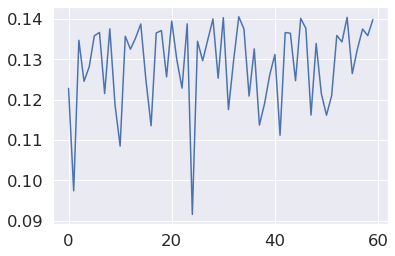

In [26]:
#Get the weights of each feature in PC1
ComponentWeight = pd.DataFrame(pca1.components_)
sb.lineplot(data=ComponentWeight.iloc[0,:])

In [27]:
#Save the features.
feature_set = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


feature_set.to_pickle("./feature_set.pkl")
turnOverRate = OccupancyTurnoverSDF.iloc[:,1]
turnOverRate.to_pickle("./turnOverRate.pkl")
LocationCode3.to_pickle("./LocationCodeComprehensive.pkl")

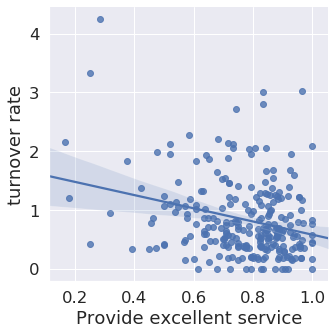

In [28]:
#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': TurnOver2, 'Provide excellent service': dataX2.iloc[:,55]} 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Provide excellent service', y='turnover rate', data=dataForPlotMVP)


In [29]:
pearsonr(dataX2.iloc[:,55], TurnOver2)

(-0.2715795642688765, 1.0063613873311625e-05)